# IMPORT THE LIBRARIES

In [3]:
#exc1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from itertools import compress
from collections import OrderedDict
from datetime import date
import datetime
from datetime import timedelta
import re

# LOAD THE PI DATA and LABORATORY ANALYSIS RESULTS

In [36]:
#Sheet From Pi
#Step1: Load the Data for the month
df_Pi_FT01_PU01 = pd.read_excel(r'C:\Users\v.t.flores\Documents\POLISHING_PUMP_FLOW_DATAGET.xlsx', sheet_name='PI_DATA', index_col=False)
#Drop the row[1]
df_Pi_FT01_PU01 = df_Pi_FT01_PU01.drop(df_Pi_FT01_PU01.index[0])
#Set the index
df_Pi_FT01_PU01.set_index('DATETIME', inplace=True)

In [37]:
df_Pi_FT01_PU01.columns

Index(['105TK05_LVL', '105TK05_TEMP', '105PU01A_CUR', '105PU01A_FLOW',
       '105FT01A_PDI', '105PU01B_CUR', '105PU01B_FLOW', '105FT01B_PDI',
       '105PU01C_CUR', '105PU01C_FLOW', '105FT01C_PDI', '105PU01D_CUR',
       '105PU01D_FLOW', '105FT01D_PDI', '105PU01E_CUR', '105PU01E_FLOW',
       '105FT01E_PDI', '105PU01F_CUR', '105PU01F_FLOW', '105FT01F_PDI',
       '105PU01G_CUR', '105PU01G_FLOW', 'DeZn_Feed_Flow', 'SEL_A', 'SEL_B',
       'SEL_C', 'SEL_D', 'SEL_E', 'SEL_F'],
      dtype='object')


# DECLARE THE FUNCTIONS

In [38]:
#fcn dfn
#used in the analysis results data. cleans up the sampling time entry
def time_cleaner(x):
    time_regex = re.compile(r'[0-8a-zA-Z:]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
    timeact = time_regex.findall(x)
    newtime = ''.join(timeact[0:5])
    f_time = check_ending_char(newtime)
    f_time1 = check_starting_char(f_time)
    t = parse(f_time1)
    new_str_time = str(t.hour)+':'+str(t.minute)+':'+str(t.second)
    return new_str_time


#fcn for formatting the dates from range str
def datesplitter_start(x):
    return parse(x.split('to')[0])
def datesplitter_end(x):
    return parse(x.split('to')[1])

#------------------

def remove_no_good_data_N2Dry_Feed(df): #removes the string value and fills it with the last good value
    
    df = pd.to_numeric(df, errors='coerce')
    for x in range(0, len(df)):
        if type(df[x]) == str:
            df[x] = df[x-1]
    df.fillna(method='ffill', inplace=True)
    return df

#---------------------------
def replace_no_good_data_with_LastGoodValues(df_col):
    
    df_col = pd.to_numeric(df_col, errors='coerce')
    for x in range(0, len(df_col)):
        if type(df_col[x]== str):
            if det_no_data(df_col[x]) == 'Calculation':
                df_col[x] = np.nan

    df_col.fillna(method='ffill', inplace= True)
    return df_col
#--------------------------------------------
def replace_no_good_data_with_Zero(df_col):

    df_col = pd.to_numeric(df_col, errors='coerce')
    for x in range(0, len(df_col)):
        if type(df_col[x]) == str:
            if det_no_data(df_col[x]) == 'Calculation':
                df_col[x] = 0
    df_col.fillna(value=0, inplace=True)
    
    return df_col
#--------------------------------------------
#--------------------------------------------
def replace_neg_data_with_Zero(df_col):
    df_col = pd.to_numeric(df_col, errors='coerce')
    for x in range(0, len(df_col)):
        if df_col[x] < 0:
            df_col[x] = 0
    return df_col
#--------------------------------------------

# Clean the Data Using the functions

In [39]:
#Clean data from no good values
df_Pi_FT01_PU01['105TK05_LVL'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105TK05_LVL'])
df_Pi_FT01_PU01['105TK05_TEMP'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105TK05_TEMP'])
df_Pi_FT01_PU01['105PU01A_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01A_CUR'])
df_Pi_FT01_PU01['105PU01A_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01A_FLOW'])
df_Pi_FT01_PU01['105FT01A_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01A_PDI'])
df_Pi_FT01_PU01['105PU01B_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01B_CUR'])
df_Pi_FT01_PU01['105PU01B_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01B_FLOW'])
df_Pi_FT01_PU01['105FT01B_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01B_PDI'])
df_Pi_FT01_PU01['105PU01C_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01C_CUR'])
df_Pi_FT01_PU01['105PU01C_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01C_FLOW'])
df_Pi_FT01_PU01['105FT01C_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01C_PDI'])
df_Pi_FT01_PU01['105PU01D_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01D_CUR'])
df_Pi_FT01_PU01['105PU01D_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01D_FLOW'])
df_Pi_FT01_PU01['105FT01D_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01D_PDI'])
df_Pi_FT01_PU01['105PU01E_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01E_CUR'])
df_Pi_FT01_PU01['105PU01E_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01E_FLOW'])
df_Pi_FT01_PU01['105FT01E_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01E_PDI'])
df_Pi_FT01_PU01['105PU01F_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01F_CUR'])
df_Pi_FT01_PU01['105PU01F_FLOW'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01F_FLOW'])
df_Pi_FT01_PU01['105FT01F_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01F_PDI'])
df_Pi_FT01_PU01['105PU01G_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01G_FLOW'])
df_Pi_FT01_PU01['DeZn_Feed_Flow'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['DeZn_Feed_Flow'])

####----------------------------------------------------------------------------------------
df_Pi_FT01_PU01['105TK05_LVL'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105TK05_LVL'])
df_Pi_FT01_PU01['105TK05_TEMP'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105TK05_TEMP'])
df_Pi_FT01_PU01['105PU01A_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01A_CUR'])
df_Pi_FT01_PU01['105PU01A_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01A_FLOW'])
df_Pi_FT01_PU01['105FT01A_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01A_PDI'])
df_Pi_FT01_PU01['105PU01B_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01B_CUR'])
df_Pi_FT01_PU01['105PU01B_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01B_FLOW'])
df_Pi_FT01_PU01['105FT01B_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01B_PDI'])
df_Pi_FT01_PU01['105PU01C_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01C_CUR'])
df_Pi_FT01_PU01['105PU01C_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01C_FLOW'])
df_Pi_FT01_PU01['105FT01C_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01C_PDI'])
df_Pi_FT01_PU01['105PU01D_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01D_CUR'])
df_Pi_FT01_PU01['105PU01D_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01D_FLOW'])
df_Pi_FT01_PU01['105FT01D_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01D_PDI'])
df_Pi_FT01_PU01['105PU01E_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01E_CUR'])
df_Pi_FT01_PU01['105PU01E_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01E_FLOW'])
df_Pi_FT01_PU01['105FT01E_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01E_PDI'])
df_Pi_FT01_PU01['105PU01F_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01F_CUR'])
df_Pi_FT01_PU01['105PU01F_FLOW'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01F_FLOW'])
df_Pi_FT01_PU01['105FT01F_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01F_PDI'])
df_Pi_FT01_PU01['105PU01G_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01G_FLOW'])
df_Pi_FT01_PU01['DeZn_Feed_Flow'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['DeZn_Feed_Flow'])

df_Pi_FT01_PU01.dropna()
print('Done. All param_df_generated', datetime.datetime.now())
#------------------------------------------------

Done. All param_df_generated 2020-05-28 08:02:34.590447


In [40]:
DF_105PU01 = df_Pi_FT01_PU01

In [41]:
DF_105PU01.index[-1]

Timestamp('2020-01-30 23:59:00')

In [42]:
DF_105PU01.columns

Index(['105TK05_LVL', '105TK05_TEMP', '105PU01A_CUR', '105PU01A_FLOW',
       '105FT01A_PDI', '105PU01B_CUR', '105PU01B_FLOW', '105FT01B_PDI',
       '105PU01C_CUR', '105PU01C_FLOW', '105FT01C_PDI', '105PU01D_CUR',
       '105PU01D_FLOW', '105FT01D_PDI', '105PU01E_CUR', '105PU01E_FLOW',
       '105FT01E_PDI', '105PU01F_CUR', '105PU01F_FLOW', '105FT01F_PDI',
       '105PU01G_CUR', '105PU01G_FLOW', 'DeZn_Feed_Flow', 'SEL_A', 'SEL_B',
       'SEL_C', 'SEL_D', 'SEL_E', 'SEL_F'],
      dtype='object')

In [50]:
df_Pi_FT01_PU01.drop(df_Pi_FT01_PU01.index[-1], inplace=True) #remove the NaT value at the end of the index
df_Pi_FT01_PU01.drop(df_Pi_FT01_PU01[df_Pi_FT01_PU01['DeZn_Feed_Flow']<500].index, inplace=True) #drop the rows where dezn flow is less than 500


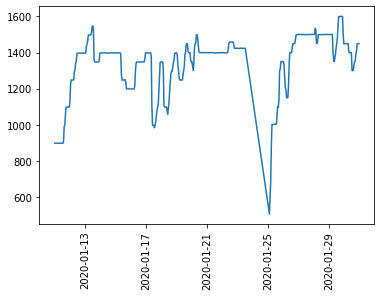

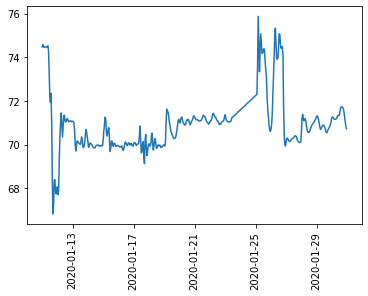

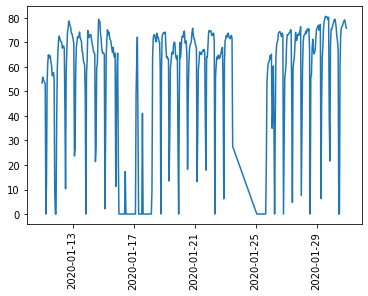

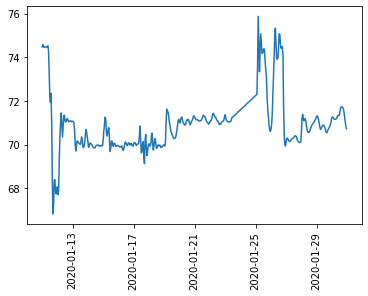

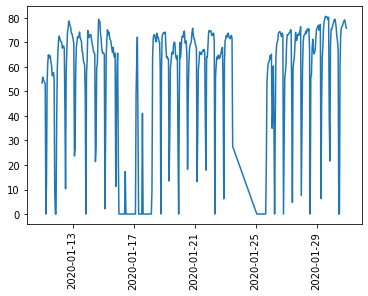

In [51]:
daterange = df_Pi_FT01_PU01.loc['2020-01-11':'2020-01-30']
plt.plot(daterange['DeZn_Feed_Flow'].index, daterange['DeZn_Feed_Flow'])
plt.xticks(rotation=90)
plt.show()
plt.plot(daterange['105TK05_TEMP'].index, daterange['105TK05_TEMP'])
plt.xticks(rotation=90)
plt.show()
plt.plot(daterange['105PU01A_CUR'].index, daterange['105PU01A_CUR'])
plt.xticks(rotation=90)
plt.show()
#drop the daterange
df_Pi_FT01_PU01.drop(daterange.index, inplace=True)

#recheck thru plot if the daterange was dropped
plt.plot(daterange['105TK05_TEMP'].index, daterange['105TK05_TEMP'])
plt.xticks(rotation=90)
plt.show()
plt.plot(daterange['105PU01A_CUR'].index, daterange['105PU01A_CUR'])
plt.xticks(rotation=90)
plt.show()

In [58]:
A_lst_DF.columns

Index(['105TK05_LVL', '105TK05_TEMP', '105PU01A_CUR', '105FT01A_PDI',
       '105PU01A_FLOW', 'SEL_A'],
      dtype='object')

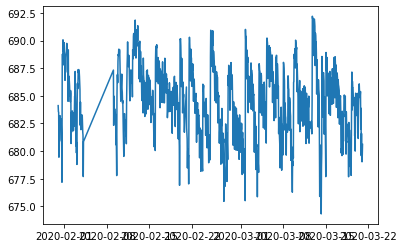

In [67]:
dates = A_lst_DF.loc['2020-01-11':'2020-03-30']
plt.plot(dates.index, dates['105PU01A_FLOW'])
plt.show()

In [75]:
#Parameter list including 105TK05 temp and 105TK05 lvl
DF_105PU01 = df_Pi_FT01_PU01
A_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01A_CUR', '105FT01A_PDI', '105PU01A_FLOW', 'SEL_A']]
B_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01B_CUR','105FT01B_PDI', '105PU01B_FLOW', 'SEL_B']]
C_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01C_CUR','105FT01C_PDI', '105PU01C_FLOW', 'SEL_C']]
D_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01D_CUR','105FT01D_PDI', '105PU01D_FLOW', 'SEL_D']]
E_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01E_CUR','105FT01E_PDI', '105PU01E_FLOW', 'SEL_E']]
F_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01F_CUR','105FT01F_PDI', '105PU01F_FLOW', 'SEL_F']]
G_lst_DF = DF_105PU01[['105TK05_LVL', '105TK05_TEMP', '105PU01G_CUR','105FT01F_PDI', '105PU01F_FLOW', 'SEL_F']]

A_lst_DF = A_lst_DF[A_lst_DF['SEL_A'] == 'OFF']
A_lst_DF = A_lst_DF[0:-1]
B_lst_DF = B_lst_DF[B_lst_DF['SEL_B'] == 'OFF']
B_lst_DF = B_lst_DF[0:-1]
C_lst_DF = C_lst_DF[C_lst_DF['SEL_C'] == 'OFF']
C_lst_DF = C_lst_DF[0:-1]
D_lst_DF = D_lst_DF[D_lst_DF['SEL_D'] == 'OFF']
D_lst_DF = D_lst_DF[0:-1]
E_lst_DF = E_lst_DF[E_lst_DF['SEL_E'] == 'OFF']
E_lst_DF = E_lst_DF[0:-1]
#F_lst_DF = F_lst_DF[F_lst_DF['SEL_F'] == 'OFF']
F_lst_DF = F_lst_DF[0:-1]

In [107]:
A_ft_not_zero = A_lst_DF[(A_lst_DF['105PU01A_CUR'] <= 0) & (A_lst_DF['105PU01A_FLOW'] != 0)]
A_lst_DF.drop(A_ft_not_zero.index, inplace=True)

B_ft_not_zero = B_lst_DF[(B_lst_DF['105PU01B_CUR'] <= 0) & (B_lst_DF['105PU01B_FLOW'] != 0)]
B_lst_DF.drop(B_ft_not_zero.index, inplace=True)

C_ft_not_zero = C_lst_DF[(C_lst_DF['105PU01C_CUR'] <= 0) & (C_lst_DF['105PU01C_FLOW'] != 0)]
C_lst_DF.drop(C_ft_not_zero.index, inplace=True)

D_ft_not_zero = D_lst_DF[(D_lst_DF['105PU01D_CUR'] <= 0) & (D_lst_DF['105PU01D_FLOW'] != 0)]
D_lst_DF.drop(D_ft_not_zero.index, inplace=True)

E_ft_not_zero = E_lst_DF[(E_lst_DF['105PU01E_CUR'] <= 0) & (E_lst_DF['105PU01E_FLOW'] != 0)]
E_lst_DF.drop(E_ft_not_zero.index, inplace=True)

F_ft_not_zero = F_lst_DF[(F_lst_DF['105PU01F_CUR'] <= 0) & (F_lst_DF['105PU01F_FLOW'] != 0)]
F_lst_DF.drop(F_ft_not_zero.index, inplace=True)

# PARAMETERS: CUR, PDI, TK05LVL

In [108]:
A_lst_xset = A_lst_DF[['105PU01A_CUR','105FT01A_PDI', '105TK05_LVL']]
A_lst_Yset = A_lst_DF['105PU01A_FLOW']
B_lst_xset = B_lst_DF[['105PU01B_CUR','105FT01B_PDI', '105TK05_LVL']]
B_lst_Yset = B_lst_DF['105PU01B_FLOW']
C_lst_xset = C_lst_DF[['105PU01C_CUR','105FT01C_PDI', '105TK05_LVL']]
C_lst_Yset = C_lst_DF['105PU01C_FLOW']
D_lst_xset = D_lst_DF[['105PU01D_CUR','105FT01D_PDI', '105TK05_LVL']]
D_lst_Yset = D_lst_DF['105PU01D_FLOW']
E_lst_xset = E_lst_DF[['105PU01E_CUR','105FT01E_PDI', '105TK05_LVL']]
E_lst_Yset = E_lst_DF['105PU01E_FLOW']
F_lst_xset = F_lst_DF[['105PU01F_CUR','105FT01F_PDI', '105TK05_LVL']]
F_lst_Yset = F_lst_DF['105PU01F_FLOW']

In [109]:
# IMPORT THE MACHINE LEARNING LIBRARIES
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X1A = A_lst_xset.dropna()
y1A = A_lst_Yset.dropna()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1A, y1A, test_size=0.20, random_state=0)

from sklearn.linear_model import LinearRegression
lm_A = LinearRegression()
lm_A.fit(X1_train,y1_train)

coeff_df_FLOW_PU01A = pd.DataFrame(zip(lm_A.coef_, X1A.columns), columns=['105PU01A_FLOW','PU01A_Param'])
A = lm_A.intercept_


In [110]:
coeff_df_FLOW_PU01A.to_excel(r'C:\Users\v.t.flores\Documents\105PU01A_FLOW1.xlsx')

# FUNCTIONS TO GENERATE THE COEFFICIENTS AND INTERCEPTS

In [112]:
def generate_lm_coefficients(df_column_toPredict, colname_lst, pumpLetter):
    X1 = colname_lst.dropna()
    y1 = df_column_toPredict.dropna()
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

    lm = LinearRegression()
    lm.fit(X1_train,y1_train)

    coeff_df_FLOW_PU01 = pd.DataFrame(zip(lm.coef_, X1.columns), columns=['105PU01'+str(pumpLetter)+'_FLOW','PU01'+str(pumpLetter)+'_Param'])
    
    return coeff_df_FLOW_PU01

#--------------------------------------
def generate_lm_intercept(df_column_toPredict, colname_lst, pumpLetter):
    X1 = colname_lst.dropna()
    y1 = df_column_toPredict.dropna()
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

    lm = LinearRegression()
    lm.fit(X1_train,y1_train)

    coeff_df_FLOW_PU01 = pd.DataFrame(zip(lm.coef_, X1.columns), columns=['105PU01'+str(pumpLetter)+'_FLOW','PU01'+str(pumpLetter)+'_Param'])
    intercept_pumpflow = lm.intercept_
    
    return intercept_pumpflow

In [119]:
A_coefficients_df = generate_lm_coefficients(A_lst_Yset, A_lst_xset, 'A')
A_intercept = generate_lm_intercept(A_lst_Yset, A_lst_xset, 'A')

B_coefficients_df = generate_lm_coefficients(B_lst_Yset, B_lst_xset, 'B')
B_intercept = generate_lm_intercept(B_lst_Yset, B_lst_xset, 'B')

C_coefficients_df = generate_lm_coefficients(C_lst_Yset, C_lst_xset, 'C')
C_intercept = generate_lm_intercept(C_lst_Yset, C_lst_xset, 'C')

D_coefficients_df = generate_lm_coefficients(D_lst_Yset, D_lst_xset, 'D')
D_intercept = generate_lm_intercept(D_lst_Yset, D_lst_xset, 'D')

E_coefficients_df = generate_lm_coefficients(E_lst_Yset, E_lst_xset, 'E')
E_intercept = generate_lm_intercept(E_lst_Yset, E_lst_xset, 'E')

F_coefficients_df = generate_lm_coefficients(F_lst_Yset, F_lst_xset, 'F')
F_intercept = generate_lm_intercept(F_lst_Yset, F_lst_xset, 'F')

ab = A_coefficients_df.join(B_coefficients_df, how='outer')
cd = C_coefficients_df.join(D_coefficients_df, how='outer')
ef = E_coefficients_df.join(F_coefficients_df, how='outer')

abcd = ab.join(cd, how='outer')
abcdef = abcd.join(ef, how='outer')

In [122]:
lst_intercepts = [A_intercept, B_intercept, C_intercept, D_intercept, E_intercept, F_intercept]
print(lst_intercepts)

[-50.97131871637541, -45.86806608444655, -84.4863304197986, -60.52401029972127, -199.67462231507497, -95.1492952445241]


In [30]:
df_Pi_FT01_PU01.to_excel(r'C:\Users\v.t.flores\Documents\Polishing_Filter_data.xlsx')

In [124]:
abcdef.to_excel(r'C:\Users\v.t.flores\Documents\105PU01_coef_202001.xlsx')

In [135]:
abcdef['Param'] = ['CUR', 'PDI', 'LVL']

In [136]:
abcdef.set_index(abcdef.Param)

,105PU01A_FLOW,PU01A_Param,105PU01B_FLOW,PU01B_Param,105PU01C_FLOW,PU01C_Param,105PU01D_FLOW,PU01D_Param,105PU01E_FLOW,PU01E_Param,105PU01F_FLOW,PU01F_Param,Param
Param,,,,,,,,,,,,,
CUR,3.407351,CUR,3.547783,105PU01B_CUR,3.257626,105PU01C_CUR,2.178435,105PU01D_CUR,5.611252,105PU01E_CUR,3.820922,105PU01F_CUR,CUR
PDI,-0.611869,PDI,-0.083041,105FT01B_PDI,-0.388686,105FT01C_PDI,-0.239893,105FT01D_PDI,-0.569772,105FT01E_PDI,-0.845621,105FT01F_PDI,PDI
LVL,0.769842,LVL,0.593790,105TK05_LVL,1.527447,105TK05_LVL,1.216804,105TK05_LVL,1.029304,105TK05_LVL,1.149037,105TK05_LVL,LVL


In [141]:
abcdef = abcdef.drop(['PU01A_Param', 'PU01B_Param', 'PU01C_Param', 'PU01D_Param', 'PU01E_Param', 'PU01F_Param'], axis=1)
abcdef = abcdef.set_index(abcdef.Param)
coeff_abcdef = abcdef.drop(['Param'], axis=1)

In [ ]:
A_lst_xset
B_lst_xset
C_lst_xset
D_lst_xset
E_lst_xset
F_lst_xset

In [143]:
coeff_abcdef = abcdef

In [142]:
abcdef

,105PU01A_FLOW,105PU01B_FLOW,105PU01C_FLOW,105PU01D_FLOW,105PU01E_FLOW,105PU01F_FLOW
Param,,,,,,
CUR,3.407351,3.547783,3.257626,2.178435,5.611252,3.820922
PDI,-0.611869,-0.083041,-0.388686,-0.239893,-0.569772,-0.845621
LVL,0.769842,0.593790,1.527447,1.216804,1.029304,1.149037


In [157]:
ft01A_lst = list()
ft01A_datelist = list()
for j in range(0, len(A_lst_xset)):
    pu01_flow = 0
    for i in range(0, len(A_lst_xset.iloc[j])):
        #print(df_main2.iloc[j][i], " * " ,coeff_Zn_drop['Zn_drop'][i])
        temp_product = A_lst_xset.iloc[j][i] * coeff_abcdef['105PU01A_FLOW'][i]
        pu01_flow = pu01_flow + temp_product
    pu01_flow_new = pu01_flow + lst_intercepts[1]
    ft01A_lst.append(pu01_flow_new)
    ft01A_datelist.append(A_lst_xset.index[j])
    
pu01_flow_and_date_lst = list(zip(ft01A_datelist, ft01A_lst))
df_pu01_flow_and_date = pd.DataFrame(pu01_flow_and_date_lst)
df_pu01_flow_and_date = df_pu01_flow_and_date.set_index(0)
df_pu01_flow_and_date['105PU01A_FLOW'] = df_pu01_flow_and_date[1]

In [158]:
df_pu01_flow_and_date

,1,105PU01A_FLOW
0,,
2020-01-01 00:00:00,206.554567,206.554567
2020-01-01 00:01:00,207.930833,207.930833
2020-01-01 00:02:00,208.540510,208.540510
2020-01-01 00:03:00,206.769829,206.769829
2020-01-01 00:04:00,208.700433,208.700433
...,...,...
2020-01-01 11:55:00,206.922465,206.922465
2020-01-01 11:56:00,207.216208,207.216208
2020-01-01 11:57:00,205.733157,205.733157


In [190]:
#Sheet From Pi
#Step1: Load the Data for the month
df_Pi_FT01_PU01 = pd.read_excel(r'C:\Users\v.t.flores\Documents\POLISHING_PUMP_FLOW_DATAGET_PRESENT.xlsx', sheet_name='PI_DATA', index_col=False)
#Drop the row[1]
df_Pi_FT01_PU01 = df_Pi_FT01_PU01.drop(df_Pi_FT01_PU01.index[0])
#Set the index
df_Pi_FT01_PU01.set_index('DATETIME', inplace=True)

In [191]:
#Clean data from no good values
df_Pi_FT01_PU01['105TK05_LVL'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105TK05_LVL'])
df_Pi_FT01_PU01['105PU01A_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01A_CUR'])
df_Pi_FT01_PU01['105FT01A_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01A_PDI'])
df_Pi_FT01_PU01['105PU01B_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01B_CUR'])
df_Pi_FT01_PU01['105FT01B_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01B_PDI'])
df_Pi_FT01_PU01['105PU01C_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01C_CUR'])
df_Pi_FT01_PU01['105FT01C_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01C_PDI'])
df_Pi_FT01_PU01['105PU01D_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01D_CUR'])
df_Pi_FT01_PU01['105FT01D_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01D_PDI'])
df_Pi_FT01_PU01['105PU01E_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01E_CUR'])
df_Pi_FT01_PU01['105FT01E_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01E_PDI'])
df_Pi_FT01_PU01['105PU01F_CUR'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105PU01F_CUR'])
df_Pi_FT01_PU01['105FT01F_PDI'] = replace_no_good_data_with_Zero(df_Pi_FT01_PU01['105FT01F_PDI'])

####----------------------------------------------------------------------------------------
df_Pi_FT01_PU01['105TK05_LVL'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105TK05_LVL'])
df_Pi_FT01_PU01['105PU01A_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01A_CUR'])
df_Pi_FT01_PU01['105FT01A_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01A_PDI'])
df_Pi_FT01_PU01['105PU01B_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01B_CUR'])
df_Pi_FT01_PU01['105FT01B_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01B_PDI'])
df_Pi_FT01_PU01['105PU01C_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01C_CUR'])
df_Pi_FT01_PU01['105FT01C_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01C_PDI'])
df_Pi_FT01_PU01['105PU01D_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01D_CUR'])
df_Pi_FT01_PU01['105FT01D_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01D_PDI'])
df_Pi_FT01_PU01['105PU01E_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01E_CUR'])
df_Pi_FT01_PU01['105FT01E_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01E_PDI'])
df_Pi_FT01_PU01['105PU01F_CUR'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105PU01F_CUR'])
df_Pi_FT01_PU01['105FT01F_PDI'] = replace_neg_data_with_Zero(df_Pi_FT01_PU01['105FT01F_PDI'])

df_Pi_FT01_PU01.dropna()
df_Pi_FT01_PU01.drop(df_Pi_FT01_PU01.index[-1], inplace=True) #remove the NaT value at the end of the index
print('Done. All param_df_generated', datetime.datetime.now())
#------------------------------------------------

Done. All param_df_generated 2020-05-28 11:23:45.676193


In [192]:
A_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01A_CUR','105FT01A_PDI', '105TK05_LVL']]
B_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01B_CUR','105FT01B_PDI', '105TK05_LVL']]
C_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01C_CUR','105FT01C_PDI', '105TK05_LVL']]
D_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01D_CUR','105FT01D_PDI', '105TK05_LVL']]
E_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01E_CUR','105FT01E_PDI', '105TK05_LVL']]
F_lst_xset_PRESENT = df_Pi_FT01_PU01[['105PU01F_CUR','105FT01F_PDI', '105TK05_LVL']]


In [175]:
ft01A_lst = list()
ft01A_datelist = list()
for j in range(0, len(A_lst_xset_PRESENT)):
    pu01_flow = 0
    for i in range(0, len(A_lst_xset_PRESENT.iloc[j])):
        #print(df_main2.iloc[j][i], " * " ,coeff_Zn_drop['Zn_drop'][i])
        temp_product = A_lst_xset_PRESENT.iloc[j][i] * coeff_abcdef['105PU01A_FLOW'][i]
        pu01_flow = pu01_flow + temp_product
    pu01_flow_new = pu01_flow + lst_intercepts[1]
    ft01A_lst.append(pu01_flow_new)
    ft01A_datelist.append(A_lst_xset_PRESENT.index[j])
    
pu01_flow_and_date_lst = list(zip(ft01A_datelist, ft01A_lst))
df_pu01_flow_and_date = pd.DataFrame(pu01_flow_and_date_lst)
df_pu01_flow_and_date = df_pu01_flow_and_date.set_index(0)
df_pu01_flow_and_date['105PU01A_FLOW'] = df_pu01_flow_and_date[1]
df_pu01_flow_and_date = df_pu01_flow_and_date.drop(1, axis=1)

In [185]:
def generate_pump_flow(pump_pi_param, pumplttr, ntrcpt_num):
    coefname = '105PU01' + str(pumplttr) + '_FLOW'
    ft01_lst = list()
    ft01_datelist = list()
    for j in range(0, len(pump_pi_param)):
        pu01_flow = 0
        for i in range(0, len(pump_pi_param.iloc[j])):
            #print(df_main2.iloc[j][i], " * " ,coeff_Zn_drop['Zn_drop'][i])
            temp_product = pump_pi_param.iloc[j][i] * coeff_abcdef[coefname][i]
            pu01_flow = pu01_flow + temp_product
        pu01_flow_new = pu01_flow + lst_intercepts[ntrcpt_num]
        ft01_lst.append(pu01_flow_new)
        ft01_datelist.append(pump_pi_param.index[j])

    pu01_flow_and_date_lst = list(zip(ft01_datelist, ft01_lst))
    df_pu01_flow_and_date = pd.DataFrame(pu01_flow_and_date_lst)
    df_pu01_flow_and_date = df_pu01_flow_and_date.set_index(0)
    df_pu01_flow_and_date[coefname] = df_pu01_flow_and_date[1]
    df_pu01_flow_and_date = df_pu01_flow_and_date.drop(1, axis=1)
    
    return df_pu01_flow_and_date

In [193]:
PU01A = generate_pump_flow(A_lst_xset_PRESENT, 'A', 0)
PU01B = generate_pump_flow(B_lst_xset_PRESENT, 'B', 1)
PU01C = generate_pump_flow(C_lst_xset_PRESENT, 'C', 2)
PU01D = generate_pump_flow(D_lst_xset_PRESENT, 'D', 3)
PU01E = generate_pump_flow(E_lst_xset_PRESENT, 'E', 4)
PU01F = generate_pump_flow(F_lst_xset_PRESENT, 'F', 5)

In [200]:
print(PU01A['105PU01A_FLOW'][-1])
print(PU01B['105PU01B_FLOW'][-1])
print(PU01C['105PU01C_FLOW'][-1])
print(PU01D['105PU01D_FLOW'][-1])
print(PU01E['105PU01E_FLOW'][-1])
print(PU01F['105PU01F_FLOW'][-1])

252.51197869967396
264.49750164401416
268.38443751045236
130.03802493564967
301.16438041628624
242.98382814979752


In [202]:
PU01A['105PU01A_FLOW'][-1] + PU01B['105PU01B_FLOW'][-1] + PU01C['105PU01C_FLOW'][-1] + PU01D['105PU01D_FLOW'][-1] +  PU01E['105PU01E_FLOW'][-1] + PU01F['105PU01F_FLOW'][-1]

1459.5801513558738

In [179]:
df_pu01_flow_and_date

,105PU01A_FLOW
0,
2020-05-28 00:00:00,229.494286
2020-05-28 00:01:00,237.943856
2020-05-28 00:02:00,238.059925
2020-05-28 00:03:00,237.403761
2020-05-28 00:04:00,237.635463
...,...
2020-05-28 10:44:00,262.825539
2020-05-28 10:45:00,262.146121
2020-05-28 10:46:00,263.984319


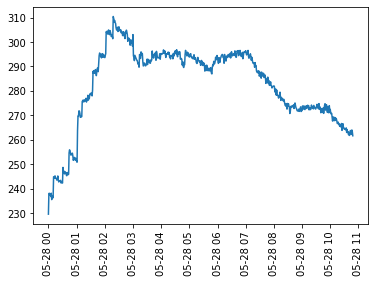

In [184]:
plt.plot(df_pu01_flow_and_date.index, df_pu01_flow_and_date['105PU01A_FLOW'])
plt.xticks(rotation=90)
plt.show()